In [10]:
import pandas as pd
import os
from pgtools.maf_parser import parse_maf, MAF
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [11]:
csv_dir = "/home/pampuch/studia/magisterka/final_summaries/scaffols_lens"
csv_name = "scaf_lens.csv"

In [12]:
for dataset in os.listdir(csv_dir):
    print(dataset)
    for f in os.listdir(os.path.join(csv_dir, dataset)):
        print(f)

sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
scaf_lens.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
scaf_lens.csv
klebsiella_subset
scaf_lens.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
scaf_lens.csv
basic_dataset_stats.csv


NotADirectoryError: [Errno 20] Not a directory: '/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/basic_dataset_stats.csv'

In [6]:
all_lens = {}
for dataset in os.listdir(csv_dir):
    print(dataset)
    for f in os.listdir(os.path.join(csv_dir, dataset)):
        df = pd.read_csv(os.path.join(csv_dir, dataset, f))
        lens = df["Len"].to_numpy()
        all_lens[datasets_mapping(dataset)] = lens

sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
klebsiella_subset
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
basic_dataset_stats.csv


NotADirectoryError: [Errno 20] Not a directory: '/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/basic_dataset_stats.csv'

In [13]:
def datasets_mapping(x):
    if x.startswith("sim"):
        x= x.replace("sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1", "E. coli ")
    else:
        x= x.replace("_subset", "")
        x= x.replace("GPSC", "Pneumococcus")
        x = x.replace("klebsiella", "Klebsiella")
    return x.strip().replace("_","")

In [7]:
dataset = "klebsiella_subset"

In [8]:
df = pd.read_csv(os.path.join(csv_dir, dataset, csv_name))

In [9]:
df

,Contig,Len
0,5235_5_12.contig00001,64326
1,5235_5_12.contig00002,60612
2,5235_5_12.contig00003,53131
3,5235_5_12.contig00004,42928
4,5235_5_12.contig00005,40521
...,...,...
15603,5235_6_6.contig01171,56
15604,5235_6_6.contig01172,56
15605,5235_6_6.contig01173,56
15606,5235_6_6.contig01174,56


In [ ]:
lens = df["Len"].to_numpy()

In [ ]:
lens

In [ ]:
max(lens)

In [ ]:
from collections import Counter

In [ ]:
len_coutns = dict(Counter(lens))

In [ ]:
len_coutns

In [ ]:

sns.histplot(lens)


In [ ]:
datasets = sorted(list(all_lens.keys()))

In [ ]:
datasets

In [ ]:
all_lens

In [ ]:
lens = []
for i in all_lens.values():
    lens += list(i)
max(lens)

In [ ]:
datasets

In [ ]:
datasets=['E. coli',
 'Pneumococcus',
 'E. coli fragmented',
 'Klebsiella',
 'E. coli contaminated',
]

In [ ]:
fig, axes = plt.subplots(3,2,figsize=(10, 14))
# fig.s
for k in range(5):
    dataset = datasets[k]
    i = k % 2
    j = k % 3
    sns.histplot(all_lens[dataset], ax=axes[j, i], bins=50, binwidth = 530000*0.01)
    axes[j, i].set_title(dataset, fontsize=13)
    axes[j, i].set_xlabel("Długość kontigu", fontsize=10)
    axes[j, i].set_ylabel("Częstość", fontsize=10)
    axes[j, i].set(xlim=(0,530000))
    axes[j, i].set(ylim=(0,15500))

# plt.show()
fig.suptitle("Rozkłady długości kontigów w poszczególnych zbiorach danych", fontsize=16)
fig.tight_layout()

axes[2, 1].axis("off")
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/scaff_lens_dists.png")
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/scaff_lens_dists.svg")

In [ ]:
round(9543, -2)

In [ ]:
all_lens_rounded = {dataset: [round(i, -1) for i in lens] for dataset, lens in all_lens.items()}

In [ ]:
for dataset, lens in all_lens_rounded.items():
    print(dataset)
    print(max(lens))
    print(min(lens))
    print(np.median(lens))
    print(np.mean(lens))

    print("-"*40)

In [ ]:
print("Średnie długości contigów wchodzących w skład genomów poszczególnych datasetów:")
columns = ["Dataset", "Liczba wszystkich kontigów", ""]
for dataset in sorted(list(all_lens.keys())):
    lens = all_lens[dataset]
    print(f"{dataset}: liczba wszystkich scaffoldów: {len(lens)}, średnia długość {np.mean(lens):.0f}")
    # print(max(lens))
    # print(min(lens))
    # print(np.median(lens))
    # print(np.mean(lens))

    # print("-"*40)

In [14]:
dataset="klebsiella_subset"
df = pd.read_csv(os.path.join(csv_dir, dataset, csv_name))
df["Genome"] = df["Contig"].apply(lambda x: x.split(".")[0])

In [15]:
df.groupby(by=["Genome"])["Len"].mean().mean().astype("int")

11384

In [ ]:
df.groupby(by=["Genome"])["Len"].count().mean().astype("int")

In [ ]:
cols = ["Dataset", "Średnia liczba kontigów w genomie", "Średnia średniej długości kontigu w genomie", "Średnia długość wszystkich kontigów w datasecie"]
data = []
for dataset in os.listdir(csv_dir):
    if "." in dataset:
        continue
    df = pd.read_csv(os.path.join(csv_dir, dataset, csv_name))
    df["Genome"] = df["Contig"].apply(lambda x: x.split(".")[0])
    data.append([datasets_mapping(dataset), df.groupby(by=["Genome"])["Len"].count().mean().astype("int"), df.groupby(by=["Genome"])["Len"].mean().mean().astype("int"), df["Len"].mean().astype("int")])

In [ ]:
data

In [ ]:
df_basic = pd.DataFrame(columns=cols, data=data)
df_basic = df_basic.sort_values(["Dataset"])

In [ ]:
df_basic

In [ ]:
df_basic.to_csv("/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/basic_dataset_stats.csv", index=False)

### Contig (genomes?) coverage

In [16]:
cont_lens_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/contig_lens_in_model/"
scaff_lens = "/home/pampuch/studia/magisterka/final_summaries/scaffols_lens"
cont_csv_name = "scaff_cont_lens.csv"
all_lens_csv = "scaf_lens.csv"

In [17]:
dataset = "GPSC_subset"
model="cactus"

In [18]:
df_cont_lens = pd.read_csv(os.path.join(cont_lens_dir, model, dataset, cont_csv_name))
df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, "scaf_lens_without_velvet.csv"))

In [19]:
df_cont_lens

,Contig,sum of seq lens in model
0,22667_7_131.ERS1699020_SC_contig000004,62859
1,Anc0.Anc0refChr36_0,29
2,22841_3_158.ERS1699832_SC_contig000010,79213
3,22841_3_7.ERS1699673_SC_contig000005,84271
4,17794_8_81.ERS719881_SC_contig000001,204228
...,...,...
1254,Anc0.Anc0refChr223_26,389
1255,17794_8_81.ERS719881_SC_contig000195,389
1256,Anc0.Anc0refChr6_26,389
1257,17794_8_81.ERS719881_SC_contig000196,389


In [20]:
df_lens

,Contig,Len
0,17870_7_11.ERS725493_SC_contig000001,393383
1,17870_7_11.ERS725493_SC_contig000002,313001
2,17870_7_11.ERS725493_SC_contig000003,200830
3,17870_7_11.ERS725493_SC_contig000004,178059
4,17870_7_11.ERS725493_SC_contig000005,158966
...,...,...
2487,22027_1_155._SC_contig000049,421
2488,22027_1_155._SC_contig000050,399
2489,22027_1_155._SC_contig000051,378
2490,22027_1_155._SC_contig000052,373


In [21]:
df_cov = df_lens.join(df_cont_lens.set_index("Contig"), on="Contig")

In [22]:
df_cov

,Contig,Len,sum of seq lens in model
0,17870_7_11.ERS725493_SC_contig000001,393383,NaN
1,17870_7_11.ERS725493_SC_contig000002,313001,NaN
2,17870_7_11.ERS725493_SC_contig000003,200830,127122.0
3,17870_7_11.ERS725493_SC_contig000004,178059,NaN
4,17870_7_11.ERS725493_SC_contig000005,158966,NaN
...,...,...,...
2487,22027_1_155._SC_contig000049,421,NaN
2488,22027_1_155._SC_contig000050,399,NaN
2489,22027_1_155._SC_contig000051,378,NaN
2490,22027_1_155._SC_contig000052,373,NaN


In [23]:
df_cov["Len"].mean()

18426.59911717496

### Are incorporated contigs longer or shorter? Have more cds coverage or less?

In [29]:
df_cov["Len"].dropna().mean()

18426.59911717496

In [34]:
df_cov.dropna()["Len"].mean()

23498.693803159174

In [27]:
df_lens.dropna()["Len"].mean()

18426.59911717496

In [ ]:
df_cov["sum of seq lens in model"].value_counts()

In [ ]:
df_cov[]

In [ ]:
df_cov.loc[df_cov.index[df_cov["sum of seq lens in model"].isna()], "sum of seq lens in model"] = 0
df_cov["Coverage"] = df_cov["sum of seq lens in model"] / df_cov["Len"]
df_cov["Coverage"] = df_cov["Coverage"].apply(lambda x: 1 if x > 1 else x)
df_cov["Genome"] = df_cov["Contig"].apply(lambda x: x.split(".")[0])
df_cov

In [ ]:
df_cov["Coverage"].

In [ ]:
df_cov_flt = df_cov[df_cov["Len"] > 100]
df_cov_flt

In [ ]:
df_genomes_cvg = df_cov.groupby("Genome")[["Len", "sum of seq lens in model"]].sum()

In [ ]:
df_genomes_cvg

In [ ]:
df_genomes_cvg["Coverage"] = df_genomes_cvg["sum of seq lens in model"] / df_genomes_cvg["Len"]
df_genomes_cvg["Coverage"] = df_genomes_cvg["Coverage"].apply(lambda x: 1 if x > 1 else x)

In [ ]:
df_genomes_cvg

In [ ]:
df_cov["Len rounded"] = df_cov["Len"].round(-2)

In [ ]:
df_cov

In [ ]:
df_cov["Len rounded"] = df_cov["Len"].round(-2)
df_genomes_cvg["Mean scaff len"] = df_cov.groupby(["Genome"])[["Len"]].mean().round().astype("int")
df_genomes_cvg["Max scaff len"] = df_cov.groupby(["Genome"])[["Len"]].max().round()
df_genomes_cvg["Median scaff len"] = df_cov.groupby(["Genome"])[["Len"]].median().round()
df_genomes_cvg["No. of scaffs"] = df_cov.groupby(["Genome"])[["Len"]].count().round()

# df_genomes_cvg["Median scaff len category"] = df_cov["Len rounded"].mode().round()
df_genomes_cvg = df_genomes_cvg.sort_values("Coverage", ascending=False)

In [ ]:
df_cov.groupby("Genome")[["Len rounded"]].agg(pd.Series.mode)

In [ ]:
df_genomes_cvg

In [ ]:
df_genomes_cvg.index

In [ ]:
genomes = df_cov["Genome"].unique()

In [ ]:
for genome in df_genomes_cvg.index:
    df = df_cov[df_cov["Genome"] == genome]
    print(genome)
    print("genome cvg: " + str(df_genomes_cvg.at[genome,"Coverage"]))
    print(df["Len rounded"].value_counts().head(n=7))

In [ ]:
df_genomes_cvg

In [ ]:
df_cov["Len"].round(-4)

In [ ]:
df_genomes_cvg.to_csv("genome_cvg.csv")
df_cov_flt.to_csv("scaff_cvg.csv")

In [ ]:
summaries_dir = "/home/pampuch/studia/magisterka/final_summaries/"

cont_lens_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/contig_lens_in_model/"
scaff_lens = "/home/pampuch/studia/magisterka/final_summaries/scaffols_lens"
cont_csv_name = "scaff_cont_lens.csv"
all_lens_csv = "scaf_lens.csv"

summaries_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/csv_summaries"
scaff_res_csv = "scaff_cov_summary.csv"
genomes_res_csv = "genomes_cov_summary.csv"

def summarise_dataset_coverages(dataset):
    for model in os.listdir(cont_lens_dir):
        print(model)
        df_cont_lens = pd.read_csv(os.path.join(cont_lens_dir, model, dataset, cont_csv_name))

            
        df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, all_lens_csv))
        
        if dataset == "GPSC_subset" and model != "panaroo":       
            df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, "scaf_lens_without_velvet.csv"))
        # print(df_lens.head())
        # print(df_cont_lens.head())
        df_cov = df_lens.join(df_cont_lens.set_index("Contig"), on="Contig")
        df_cov.loc[df_cov.index[df_cov["sum of seq lens in model"].isna()], "sum of seq lens in model"] = 0
        df_cov["Coverage"] = df_cov["sum of seq lens in model"] / df_cov["Len"]
        df_cov["Coverage"] = df_cov["Coverage"].apply(lambda x: 1 if x > 1 else x)
        df_cov["Genome"] = df_cov["Contig"].apply(lambda x: x.split(".")[0])
        
        df_genomes_cvg = df_cov.groupby("Genome")[["Len", "sum of seq lens in model"]].sum()
        df_genomes_cvg["Coverage"] = df_genomes_cvg["sum of seq lens in model"] / df_genomes_cvg["Len"]
        df_genomes_cvg["Coverage"] = df_genomes_cvg["Coverage"].apply(lambda x: 1 if x > 1 else x)

        df_cov["Len rounded"] = df_cov["Len"].round(-2)
        df_genomes_cvg["Mean scaff len"] = df_cov.groupby(["Genome"])[["Len"]].mean().round().astype("int")
        df_genomes_cvg["Max scaff len"] = df_cov.groupby(["Genome"])[["Len"]].max().round()
        df_genomes_cvg["Median scaff len"] = df_cov.groupby(["Genome"])[["Len"]].median().round()
        df_genomes_cvg["No. of scaffs"] = df_cov.groupby(["Genome"])[["Len"]].count().round()
        
        # df_genomes_cvg["Median scaff len category"] = df_cov["Len rounded"].mode().round()
        df_genomes_cvg = df_genomes_cvg.sort_values("Coverage", ascending=False)
        print(df_genomes_cvg["Coverage"].head())
        df_cov.to_csv(os.path.join(summaries_dir, model, dataset, scaff_res_csv), index=False)
        df_genomes_cvg.to_csv(os.path.join(summaries_dir, model, dataset, genomes_res_csv), index=False)
summarise_dataset_coverages("klebsiella_subset")

In [ ]:
for dataset in os.listdir(scaff_lens):
    if "." not in dataset:
        summarise_dataset_coverages(dataset)

In [ ]:
for dataset in os.listdir(scaff_lens):
    if "." in dataset:
        continue
    print(dataset)
    for model in os.listdir(cont_lens_dir):
        if "." in model:
            continue
        print(model)
        for f in os.listdir(os.path.join(summaries_dir, model, dataset)):

            f_path = os.path.join(summaries_dir, model, dataset, f)
            df = pd.read_csv(f_path)
            print(dataset)
            print(df["Coverage"].mean())

In [ ]:
def summarise_dataset_coverages(dataset):
    for model in os.listdir(cont_lens_dir):
        print(model)
        df_cont_lens = pd.read_csv(os.path.join(cont_lens_dir, model, dataset, cont_csv_name))

            
        df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, all_lens_csv))
        df_cov = df_lens.join(df_cont_lens.set_index("Contig"), on="Contig")
        if dataset == "GPSC_subset" and model != "panaroo":       
            df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, "scaf_lens_without_velvet.csv"))
        print(df_lens.head())
        print(df_cont_lens.head())
        df_cov.loc[df_cov.index[df_cov["sum of seq lens in model"].isna()], "sum of seq lens in model"] = 0
        df_cov["Coverage"] = df_cov["sum of seq lens in model"] / df_cov["Len"]
        df_cov["Coverage"] = df_cov["Coverage"].apply(lambda x: 1 if x > 1 else x)
        df_cov["Genome"] = df_cov["Contig"].apply(lambda x: x.split(".")[0])
        
        df_genomes_cvg = df_cov.groupby("Genome")[["Len", "sum of seq lens in model"]].sum()
        df_genomes_cvg["Coverage"] = df_genomes_cvg["sum of seq lens in model"] / df_genomes_cvg["Len"]
        df_genomes_cvg["Coverage"] = df_genomes_cvg["Coverage"].apply(lambda x: 1 if x > 1 else x)

        df_cov["Len rounded"] = df_cov["Len"].round(-2)
        df_genomes_cvg["Mean scaff len"] = df_cov.groupby(["Genome"])[["Len"]].mean().round().astype("int")
        df_genomes_cvg["Max scaff len"] = df_cov.groupby(["Genome"])[["Len"]].max().round()
        df_genomes_cvg["Median scaff len"] = df_cov.groupby(["Genome"])[["Len"]].median().round()
        df_genomes_cvg["No. of scaffs"] = df_cov.groupby(["Genome"])[["Len"]].count().round()
        
        # df_genomes_cvg["Median scaff len category"] = df_cov["Len rounded"].mode().round()
        df_genomes_cvg = df_genomes_cvg.sort_values("Coverage", ascending=False)
        print(df_genomes_cvg.head())
        df_cov.to_csv(os.path.join(summaries_dir, model, dataset, scaff_res_csv), index=False)
        df_genomes_cvg.to_csv(os.path.join(summaries_dir, model, dataset, genomes_res_csv), index=False)

    return df_genomes_cvg, df_cov

df_genomes, df_cov = summarise_dataset_coverages("GPSC_subset")

In [ ]:
df_genomes

In [472]:
df_cov

,Contig,Len,sum of seq lens in model,Coverage,Genome,Len rounded
0,17870_7_11.ERS725493_SC_contig000001,393383,0.0,0.000000,17870_7_11,393400
1,17870_7_11.ERS725493_SC_contig000002,313001,0.0,0.000000,17870_7_11,313000
2,17870_7_11.ERS725493_SC_contig000003,200830,127122.0,0.632983,17870_7_11,200800
3,17870_7_11.ERS725493_SC_contig000004,178059,0.0,0.000000,17870_7_11,178100
4,17870_7_11.ERS725493_SC_contig000005,158966,0.0,0.000000,17870_7_11,159000
...,...,...,...,...,...,...
2487,22027_1_155._SC_contig000049,421,0.0,0.000000,22027_1_155,400
2488,22027_1_155._SC_contig000050,399,0.0,0.000000,22027_1_155,400
2489,22027_1_155._SC_contig000051,378,0.0,0.000000,22027_1_155,400
2490,22027_1_155._SC_contig000052,373,0.0,0.000000,22027_1_155,400


In [473]:
dataset = "GPSC_subset"

### Histogramy pokrycia

Dla każdego datasetu po 3 (panaroo, cactus, panaroo uzupełnione)

In [474]:
cvg_dict = {}
for dataset in os.listdir(scaff_lens):
    
    if "." in dataset:
        continue
    print(dataset)
    dataset_name = datasets_mapping(dataset)
    cvg_dict[dataset_name] = {}
    for model in os.listdir(cont_lens_dir):
        if "." in model:
            continue
        print(model)
        
        for f in os.listdir(os.path.join(summaries_dir, model, dataset)):
            if not f.startswith("genome"):
                continue
            f_path = os.path.join(summaries_dir, model, dataset, f)
            df = pd.read_csv(f_path)
            print(dataset)
            print(df["Coverage"].mean())
            cvg_dict[dataset_name][model] = df["Coverage"].to_numpy()



sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.8077532581182215
panaroo_compl
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.8933529395289652
cactus
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.4143351453336534
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.8352082416217825
panaroo_compl
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.9254518536638848
cactus
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.918336531375397
klebsiella_subset
panaroo
klebsiella_subset
0.8077184326242278
panaroo_compl
klebsiella_subset
0.8826909023241116
cactus
klebsiella_subset
0.21471684562243626
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
0.8399943115283734
panaroo_compl
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
0.9317783176195775
cactus
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
0.933561279595239
GPSC_subset
panaroo
GPSC_subset
0.8399347252731039
panaro

In [475]:
cvg_dict

{'E. coli fragmented': {'panaroo': array([0.81354092, 0.81344093, 0.81317215, 0.8131504 , 0.81303037,
         0.81299042, 0.81264891, 0.81242372, 0.81237359, 0.81205469,
         0.81177167, 0.81164127, 0.81117368, 0.81114186, 0.81086985,
         0.81064177, 0.81053274, 0.81044742, 0.81042634, 0.81034855,
         0.8103262 , 0.81018974, 0.81006385, 0.80999034, 0.80984311,
         0.80964578, 0.80940754, 0.80930019, 0.80923272, 0.80917736,
         0.80909927, 0.80889333, 0.80884504, 0.80877677, 0.80872956,
         0.80862967, 0.80849321, 0.80831666, 0.80829865, 0.80819252,
         0.80794727, 0.80776469, 0.80768714, 0.80763059, 0.80755736,
         0.80746707, 0.80741122, 0.80738895, 0.80738795, 0.80730478,
         0.8072517 , 0.8072327 , 0.80717157, 0.80716204, 0.80715762,
         0.8071441 , 0.80700897, 0.80696281, 0.80696134, 0.80694407,
         0.8069277 , 0.80688654, 0.80682972, 0.80675068, 0.80670828,
         0.80669807, 0.80665533, 0.80659268, 0.80657999, 0.80645786,
 

In [476]:
datasets = []
model_names = set()
for dataset, models in cvg_dict.items():
    datasets.append(dataset)
    for model, cvg in models.items():
        model_names.add(model)
datasets = sorted(datasets)        

In [477]:
datasets

['E. coli',
 'E. coli contaminated',
 'E. coli fragmented',
 'Klebsiella',
 'Pneumococcus']

In [478]:
model_names

{'cactus', 'panaroo', 'panaroo_compl'}

In [479]:
model_names = ["panaroo","panaroo_compl","cactus"]


In [480]:
dataset = "Klebsiella"

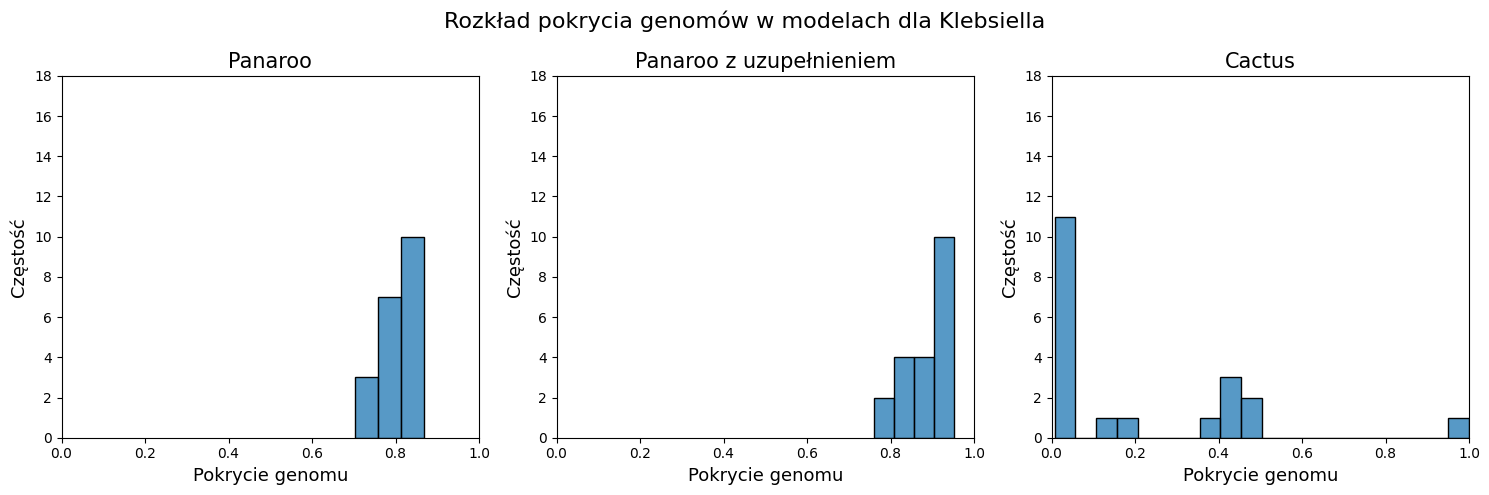

In [481]:
dataset = "Klebsiella"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,3,figsize=(15, 5))
# fig.s
for k in range(3):
    model = model_names[k]
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print()
    sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.05*1)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,18))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

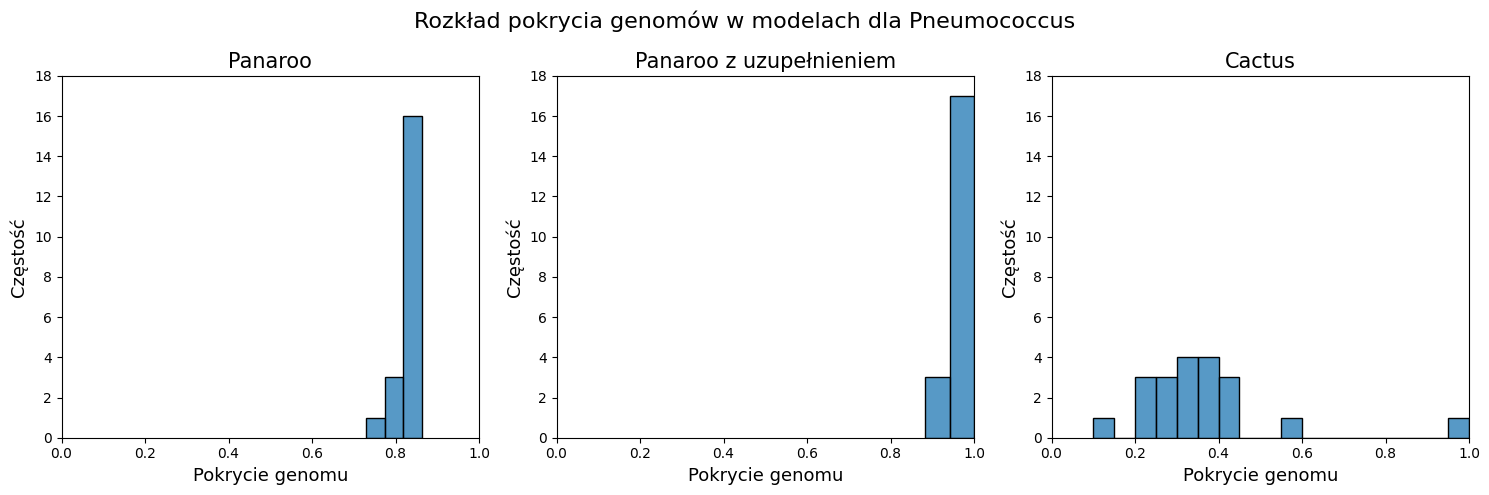

In [482]:
dataset = "Pneumococcus"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,3,figsize=(15, 5))
# fig.s
for k in range(3):
    model = model_names[k]
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print()
    sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.05*1)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,18))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

panaroo
panaroo_compl
cactus


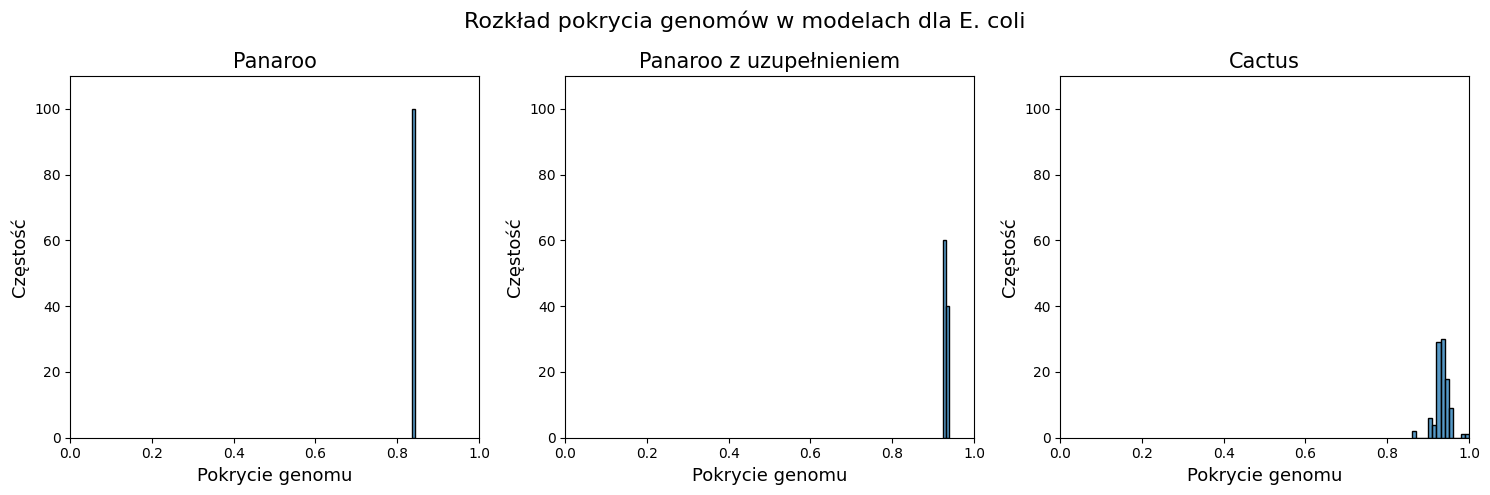

In [483]:
dataset = "E. coli"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,3,figsize=(15, 5))
# fig.s
for k in range(3):
    model = model_names[k]
    print(model)
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print(cvg_dict[dataset][model])
    sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.01)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,110))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

panaroo
panaroo_compl
cactus


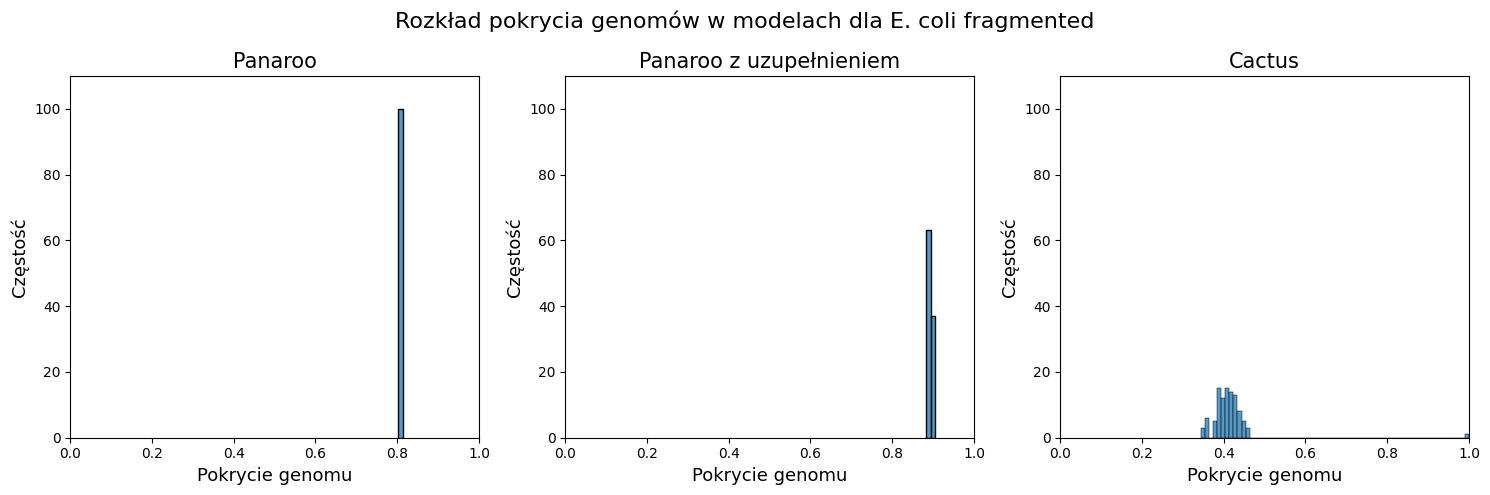

In [484]:
dataset = "E. coli fragmented"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,3,figsize=(15, 5))
# fig.s
for k in range(3):
    model = model_names[k]
    print(model)
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print(cvg_dict[dataset][model])
    sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.01)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,110))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

panaroo
panaroo_compl
cactus


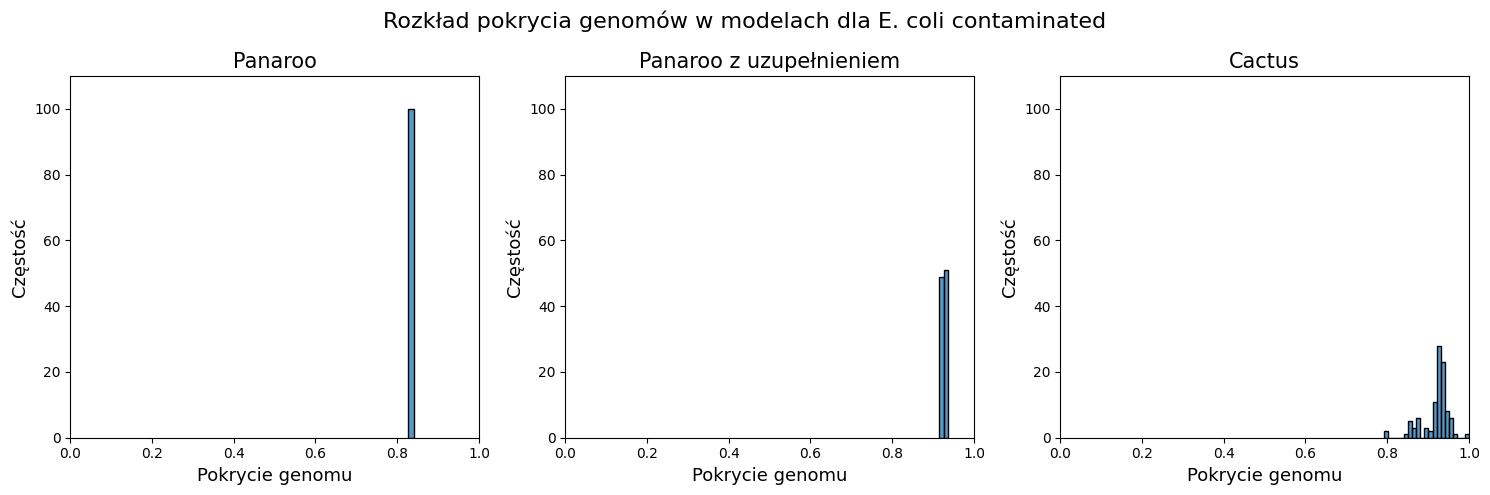

In [485]:
dataset = "E. coli contaminated"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,3,figsize=(15, 5))
# fig.s
for k in range(3):
    model = model_names[k]
    print(model)
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print(cvg_dict[dataset][model])
    sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.01)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,110))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")